In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [14]:
# Data Preparation
schedule_data = {
    'event': [
        'Home', 'MAP, PAM', 'Home', 'Comp Design Workflows', 'Home',
        'Home', 'Comp Modeling', 'Home', 'Mapping Systems', 'Home',
        'Home', 'MAP, PAM', 'Home', 'Comp Design Workflows', 'Home',
        'Home', 'MAP, PAM', 'Home', 'Mapping Systems', 'Home',
        'Home', 'Comp Modeling', 'Home'
    ],
    'latitude': [
        40.8021406263019, 40.80782989687754, 40.8021406263019, 40.80782989687754, 40.8021406263019,
        40.8021406263019, 40.808314003981444, 40.8021406263019, 40.80782989687754, 40.8021406263019,
        40.8021406263019, 40.80782989687754, 40.8021406263019, 40.80782989687754, 40.8021406263019,
        40.8021406263019, 40.80782989687754, 40.8021406263019, 40.80782989687754, 40.8021406263019,
        40.8021406263019, 40.808314003981444, 40.8021406263019
    ],
    'longitude': [
        -73.96390876165282, -73.96129582731541, -73.96390876165282, -73.96129582731541, -73.96390876165282,
        -73.96390876165282, -73.9610488397325, -73.96390876165282, -73.96129582731541, -73.96390876165282,
        -73.96390876165282, -73.96129582731541, -73.96390876165282, -73.96129582731541, -73.96390876165282,
        -73.96390876165282, -73.96129582731541, -73.96390876165282, -73.96129582731541, -73.96390876165282,
        -73.96390876165282, -73.9610488397325, -73.96390876165282
    ],
    'start_time': [
        '2024-08-05 07:00', '2024-08-05 12:00', '2024-08-05 16:00', '2024-08-05 18:30', '2024-08-05 20:30',
        '2024-08-06 07:00', '2024-08-06 09:00', '2024-08-06 11:00', '2024-08-06 18:00', '2024-08-06 20:00',
        '2024-08-07 07:00', '2024-08-07 12:00', '2024-08-07 16:00', '2024-08-07 18:30', '2024-08-07 20:30',
        '2024-08-08 07:00', '2024-08-08 12:00', '2024-08-08 16:00', '2024-08-08 18:00', '2024-08-08 20:00',
        '2024-08-09 07:00', '2024-08-09 09:00', '2024-08-09 11:00'
    ],
    'end_time': [
        '2024-08-05 12:00', '2024-08-05 16:00', '2024-08-05 18:30', '2024-08-05 20:30', '2024-08-06 07:00',
        '2024-08-06 09:00', '2024-08-06 11:00', '2024-08-06 18:00', '2024-08-06 20:00', '2024-08-07 07:00',
        '2024-08-07 12:00', '2024-08-07 16:00', '2024-08-07 18:30', '2024-08-07 20:30', '2024-08-08 07:00',
        '2024-08-08 12:00', '2024-08-08 16:00', '2024-08-08 18:00', '2024-08-08 20:00', '2024-08-09 07:00',
        '2024-08-09 09:00', '2024-08-09 11:00', '2024-08-09 12:00'
    ]
}

In [15]:
df_schedule = pd.DataFrame(schedule_data)
df_schedule['start_time'] = pd.to_datetime(df_schedule['start_time'])
df_schedule['end_time'] = pd.to_datetime(df_schedule['end_time'])

# Convert start and end times to numeric values for plotting in 3D
df_schedule['start_numeric'] = (df_schedule['start_time'] - df_schedule['start_time'].min()).dt.total_seconds()
df_schedule['end_numeric'] = (df_schedule['end_time'] - df_schedule['start_time'].min()).dt.total_seconds()

# Debugging: Print DataFrame to ensure data is correct
print(df_schedule)


                    event   latitude  longitude          start_time  \
0                    Home  40.802141 -73.963909 2024-08-05 07:00:00   
1                MAP, PAM  40.807830 -73.961296 2024-08-05 12:00:00   
2                    Home  40.802141 -73.963909 2024-08-05 16:00:00   
3   Comp Design Workflows  40.807830 -73.961296 2024-08-05 18:30:00   
4                    Home  40.802141 -73.963909 2024-08-05 20:30:00   
5                    Home  40.802141 -73.963909 2024-08-06 07:00:00   
6           Comp Modeling  40.808314 -73.961049 2024-08-06 09:00:00   
7                    Home  40.802141 -73.963909 2024-08-06 11:00:00   
8         Mapping Systems  40.807830 -73.961296 2024-08-06 18:00:00   
9                    Home  40.802141 -73.963909 2024-08-06 20:00:00   
10                   Home  40.802141 -73.963909 2024-08-07 07:00:00   
11               MAP, PAM  40.807830 -73.961296 2024-08-07 12:00:00   
12                   Home  40.802141 -73.963909 2024-08-07 16:00:00   
13  Co

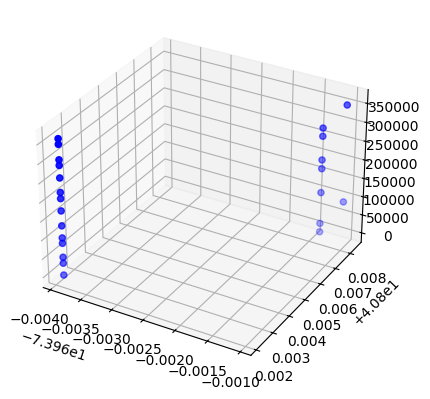

In [16]:
# 3D Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points and paths
ax.scatter(df_schedule['longitude'], df_schedule['latitude'], df_schedule['start_numeric'], c='blue', marker='o')


In [17]:
# Add lines connecting the points to show the movement over time
for i in range(len(df_schedule) - 1):
    xs = [df_schedule['longitude'].iloc[i], df_schedule['longitude'].iloc[i + 1]]
    ys = [df_schedule['latitude'].iloc[i], df_schedule['latitude'].iloc[i + 1]]
    zs = [df_schedule['start_numeric'].iloc[i], df_schedule['start_numeric'].iloc[i + 1]]
    ax.plot(xs, ys, zs, color='blue')



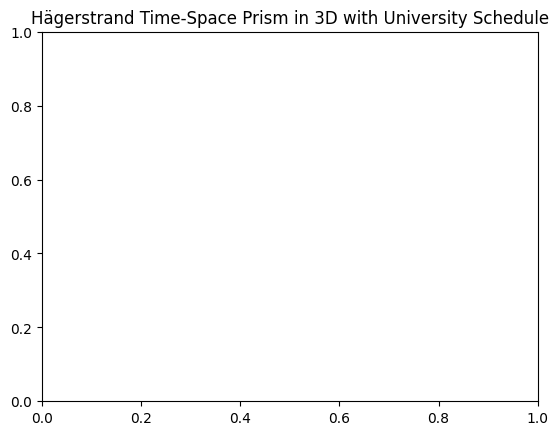

In [18]:
# Adding annotations for events and times
for x, y, z, label in zip(df_schedule['longitude'], df_schedule['latitude'], df_schedule['start_numeric'], df_schedule['start_time']):
    ax.text(x, y, z, str(label.time()), fontsize=9, ha='right')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Time (seconds since start)')
plt.title('Hägerstrand Time-Space Prism in 3D with University Schedule')
plt.show()

                    event   latitude  longitude          start_time  \
0                    Home  40.802141 -73.963909 2024-08-05 07:00:00   
1                MAP, PAM  40.807830 -73.961296 2024-08-05 12:00:00   
2                    Home  40.802141 -73.963909 2024-08-05 16:00:00   
3   Comp Design Workflows  40.807830 -73.961296 2024-08-05 18:30:00   
4                    Home  40.802141 -73.963909 2024-08-05 20:30:00   
5                    Home  40.802141 -73.963909 2024-08-06 07:00:00   
6           Comp Modeling  40.808314 -73.961049 2024-08-06 09:00:00   
7                    Home  40.802141 -73.963909 2024-08-06 11:00:00   
8         Mapping Systems  40.807830 -73.961296 2024-08-06 18:00:00   
9                    Home  40.802141 -73.963909 2024-08-06 20:00:00   
10                   Home  40.802141 -73.963909 2024-08-07 07:00:00   
11               MAP, PAM  40.807830 -73.961296 2024-08-07 12:00:00   
12                   Home  40.802141 -73.963909 2024-08-07 16:00:00   
13  Co

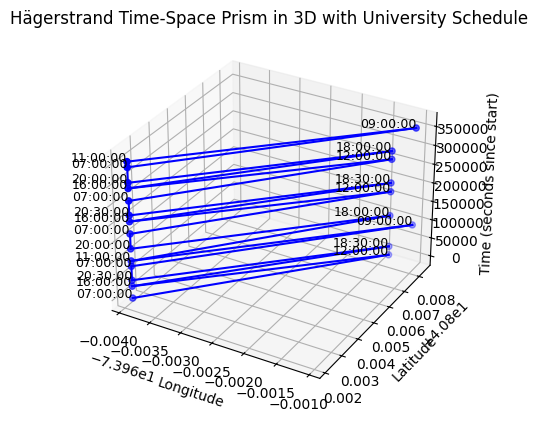

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data Preparation
schedule_data = {
    'event': [
        'Home', 'MAP, PAM', 'Home', 'Comp Design Workflows', 'Home',
        'Home', 'Comp Modeling', 'Home', 'Mapping Systems', 'Home',
        'Home', 'MAP, PAM', 'Home', 'Comp Design Workflows', 'Home',
        'Home', 'MAP, PAM', 'Home', 'Mapping Systems', 'Home',
        'Home', 'Comp Modeling', 'Home'
    ],
    'latitude': [
        40.8021406263019, 40.80782989687754, 40.8021406263019, 40.80782989687754, 40.8021406263019,
        40.8021406263019, 40.808314003981444, 40.8021406263019, 40.80782989687754, 40.8021406263019,
        40.8021406263019, 40.80782989687754, 40.8021406263019, 40.80782989687754, 40.8021406263019,
        40.8021406263019, 40.80782989687754, 40.8021406263019, 40.80782989687754, 40.8021406263019,
        40.8021406263019, 40.808314003981444, 40.8021406263019
    ],
    'longitude': [
        -73.96390876165282, -73.96129582731541, -73.96390876165282, -73.96129582731541, -73.96390876165282,
        -73.96390876165282, -73.9610488397325, -73.96390876165282, -73.96129582731541, -73.96390876165282,
        -73.96390876165282, -73.96129582731541, -73.96390876165282, -73.96129582731541, -73.96390876165282,
        -73.96390876165282, -73.96129582731541, -73.96390876165282, -73.96129582731541, -73.96390876165282,
        -73.96390876165282, -73.9610488397325, -73.96390876165282
    ],
    'start_time': [
        '2024-08-05 07:00', '2024-08-05 12:00', '2024-08-05 16:00', '2024-08-05 18:30', '2024-08-05 20:30',
        '2024-08-06 07:00', '2024-08-06 09:00', '2024-08-06 11:00', '2024-08-06 18:00', '2024-08-06 20:00',
        '2024-08-07 07:00', '2024-08-07 12:00', '2024-08-07 16:00', '2024-08-07 18:30', '2024-08-07 20:30',
        '2024-08-08 07:00', '2024-08-08 12:00', '2024-08-08 16:00', '2024-08-08 18:00', '2024-08-08 20:00',
        '2024-08-09 07:00', '2024-08-09 09:00', '2024-08-09 11:00'
    ],
    'end_time': [
        '2024-08-05 12:00', '2024-08-05 16:00', '2024-08-05 18:30', '2024-08-05 20:30', '2024-08-06 07:00',
        '2024-08-06 09:00', '2024-08-06 11:00', '2024-08-06 18:00', '2024-08-06 20:00', '2024-08-07 07:00',
        '2024-08-07 12:00', '2024-08-07 16:00', '2024-08-07 18:30', '2024-08-07 20:30', '2024-08-08 07:00',
        '2024-08-08 12:00', '2024-08-08 16:00', '2024-08-08 18:00', '2024-08-08 20:00', '2024-08-09 07:00',
        '2024-08-09 09:00', '2024-08-09 11:00', '2024-08-09 12:00'
    ]
}

df_schedule = pd.DataFrame(schedule_data)
df_schedule['start_time'] = pd.to_datetime(df_schedule['start_time'])
df_schedule['end_time'] = pd.to_datetime(df_schedule['end_time'])

# Convert start and end times to numeric values for plotting in 3D
df_schedule['start_numeric'] = (df_schedule['start_time'] - df_schedule['start_time'].min()).dt.total_seconds()
df_schedule['end_numeric'] = (df_schedule['end_time'] - df_schedule['start_time'].min()).dt.total_seconds()

# Debugging: Print DataFrame to ensure data is correct
print(df_schedule)

# 3D Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points and paths
ax.scatter(df_schedule['longitude'], df_schedule['latitude'], df_schedule['start_numeric'], c='blue', marker='o')

# Add lines connecting the points to show the movement over time
for i in range(len(df_schedule) - 1):
    xs = [df_schedule['longitude'].iloc[i], df_schedule['longitude'].iloc[i + 1]]
    ys = [df_schedule['latitude'].iloc[i], df_schedule['latitude'].iloc[i + 1]]
    zs = [df_schedule['start_numeric'].iloc[i], df_schedule['start_numeric'].iloc[i + 1]]
    ax.plot(xs, ys, zs, color='blue')

# Adding annotations for events and times
for x, y, z, label in zip(df_schedule['longitude'], df_schedule['latitude'], df_schedule['start_numeric'], df_schedule['start_time']):
    ax.text(x, y, z, str(label.time()), fontsize=9, ha='right')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Time (seconds since start)')
plt.title('Hägerstrand Time-Space Prism in 3D with University Schedule')
plt.show()

                    event   latitude  longitude          start_time  \
0                    Home  40.802141 -73.963909 2024-08-05 07:00:00   
1                MAP, PAM  40.807830 -73.961296 2024-08-05 12:00:00   
2                    Home  40.802141 -73.963909 2024-08-05 16:00:00   
3   Comp Design Workflows  40.807830 -73.961296 2024-08-05 18:30:00   
4                    Home  40.802141 -73.963909 2024-08-05 20:30:00   
5                    Home  40.802141 -73.963909 2024-08-06 07:00:00   
6           Comp Modeling  40.808314 -73.961049 2024-08-06 09:00:00   
7                    Home  40.802141 -73.963909 2024-08-06 11:00:00   
8         Mapping Systems  40.807830 -73.961296 2024-08-06 18:00:00   
9                    Home  40.802141 -73.963909 2024-08-06 20:00:00   
10                   Home  40.802141 -73.963909 2024-08-07 07:00:00   
11               MAP, PAM  40.807830 -73.961296 2024-08-07 12:00:00   
12                   Home  40.802141 -73.963909 2024-08-07 16:00:00   
13  Co

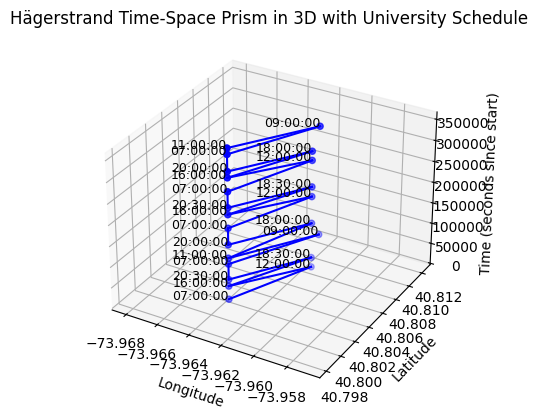

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data Preparation
schedule_data = {
    'event': [
        'Home', 'MAP, PAM', 'Home', 'Comp Design Workflows', 'Home',
        'Home', 'Comp Modeling', 'Home', 'Mapping Systems', 'Home',
        'Home', 'MAP, PAM', 'Home', 'Comp Design Workflows', 'Home',
        'Home', 'MAP, PAM', 'Home', 'Mapping Systems', 'Home',
        'Home', 'Comp Modeling', 'Home'
    ],
    'latitude': [
        40.8021406263019, 40.80782989687754, 40.8021406263019, 40.80782989687754, 40.8021406263019,
        40.8021406263019, 40.808314003981444, 40.8021406263019, 40.80782989687754, 40.8021406263019,
        40.8021406263019, 40.80782989687754, 40.8021406263019, 40.80782989687754, 40.8021406263019,
        40.8021406263019, 40.80782989687754, 40.8021406263019, 40.80782989687754, 40.8021406263019,
        40.8021406263019, 40.808314003981444, 40.8021406263019
    ],
    'longitude': [
        -73.96390876165282, -73.96129582731541, -73.96390876165282, -73.96129582731541, -73.96390876165282,
        -73.96390876165282, -73.9610488397325, -73.96390876165282, -73.96129582731541, -73.96390876165282,
        -73.96390876165282, -73.96129582731541, -73.96390876165282, -73.96129582731541, -73.96390876165282,
        -73.96390876165282, -73.96129582731541, -73.96390876165282, -73.96129582731541, -73.96390876165282,
        -73.96390876165282, -73.9610488397325, -73.96390876165282
    ],
    'start_time': [
        '2024-08-05 07:00', '2024-08-05 12:00', '2024-08-05 16:00', '2024-08-05 18:30', '2024-08-05 20:30',
        '2024-08-06 07:00', '2024-08-06 09:00', '2024-08-06 11:00', '2024-08-06 18:00', '2024-08-06 20:00',
        '2024-08-07 07:00', '2024-08-07 12:00', '2024-08-07 16:00', '2024-08-07 18:30', '2024-08-07 20:30',
        '2024-08-08 07:00', '2024-08-08 12:00', '2024-08-08 16:00', '2024-08-08 18:00', '2024-08-08 20:00',
        '2024-08-09 07:00', '2024-08-09 09:00', '2024-08-09 11:00'
    ],
    'end_time': [
        '2024-08-05 12:00', '2024-08-05 16:00', '2024-08-05 18:30', '2024-08-05 20:30', '2024-08-06 07:00',
        '2024-08-06 09:00', '2024-08-06 11:00', '2024-08-06 18:00', '2024-08-06 20:00', '2024-08-07 07:00',
        '2024-08-07 12:00', '2024-08-07 16:00', '2024-08-07 18:30', '2024-08-07 20:30', '2024-08-08 07:00',
        '2024-08-08 12:00', '2024-08-08 16:00', '2024-08-08 18:00', '2024-08-08 20:00', '2024-08-09 07:00',
        '2024-08-09 09:00', '2024-08-09 11:00', '2024-08-09 12:00'
    ]
}

df_schedule = pd.DataFrame(schedule_data)
df_schedule['start_time'] = pd.to_datetime(df_schedule['start_time'])
df_schedule['end_time'] = pd.to_datetime(df_schedule['end_time'])

# Convert start and end times to numeric values for plotting in 3D
df_schedule['start_numeric'] = (df_schedule['start_time'] - df_schedule['start_time'].min()).dt.total_seconds()
df_schedule['end_numeric'] = (df_schedule['end_time'] - df_schedule['start_time'].min()).dt.total_seconds()

# Debugging: Print DataFrame to ensure data is correct
print(df_schedule)

# 3D Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set axis limits to extend the range beyond the data points for better readability
ax.set_xlim(min(df_schedule['longitude']) - 0.005, max(df_schedule['longitude']) + 0.005)
ax.set_ylim(min(df_schedule['latitude']) - 0.005, max(df_schedule['latitude']) + 0.005)
ax.set_zlim(min(df_schedule['start_numeric']) - 3600, max(df_schedule['end_numeric']) + 3600)

# Plot the points and paths
ax.scatter(df_schedule['longitude'], df_schedule['latitude'], df_schedule['start_numeric'], c='blue', marker='o')

# Add lines connecting the points to show the movement over time
for i in range(len(df_schedule) - 1):
    xs = [df_schedule['longitude'].iloc[i], df_schedule['longitude'].iloc[i + 1]]
    ys = [df_schedule['latitude'].iloc[i], df_schedule['latitude'].iloc[i + 1]]
    zs = [df_schedule['start_numeric'].iloc[i], df_schedule['start_numeric'].iloc[i + 1]]
    ax.plot(xs, ys, zs, color='blue')

# Adding annotations for events and times
for x, y, z, label in zip(df_schedule['longitude'], df_schedule['latitude'], df_schedule['start_numeric'], df_schedule['start_time']):
    ax.text(x, y, z, str(label.time()), fontsize=9, ha='right')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Time (seconds since start)')
plt.title('Hägerstrand Time-Space Prism in 3D with University Schedule')
plt.show()

                   event   latitude  longitude          start_time  \
0                   Home  40.802141 -73.963909 2024-08-05 07:00:00   
1               MAP, PAM  40.807830 -73.961296 2024-08-05 12:00:00   
2                   Home  40.802141 -73.963909 2024-08-05 16:00:00   
3  Comp Design Workflows  40.807830 -73.961296 2024-08-05 18:30:00   
4                   Home  40.802141 -73.963909 2024-08-05 20:30:00   

             end_time  start_numeric  end_numeric  
0 2024-08-05 12:00:00            0.0      18000.0  
1 2024-08-05 16:00:00        18000.0      32400.0  
2 2024-08-05 18:30:00        32400.0      41400.0  
3 2024-08-05 20:30:00        41400.0      48600.0  
4 2024-08-06 07:00:00        48600.0      86400.0  


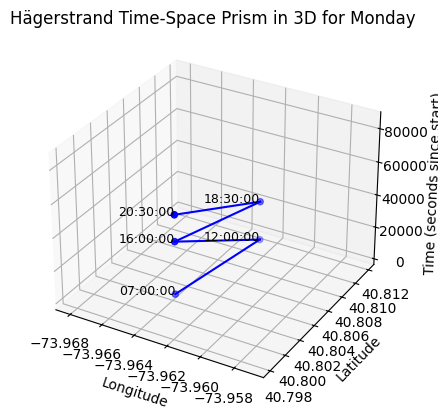

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data Preparation for Monday
monday_data = {
    'event': [
        'Home', 'MAP, PAM', 'Home', 'Comp Design Workflows', 'Home'
    ],
    'latitude': [
        40.8021406263019, 40.80782989687754, 40.8021406263019, 40.80782989687754, 40.8021406263019
    ],
    'longitude': [
        -73.96390876165282, -73.96129582731541, -73.96390876165282, -73.96129582731541, -73.96390876165282
    ],
    'start_time': [
        '2024-08-05 07:00', '2024-08-05 12:00', '2024-08-05 16:00', '2024-08-05 18:30', '2024-08-05 20:30'
    ],
    'end_time': [
        '2024-08-05 12:00', '2024-08-05 16:00', '2024-08-05 18:30', '2024-08-05 20:30', '2024-08-06 07:00'
    ]
}

df_monday = pd.DataFrame(monday_data)
df_monday['start_time'] = pd.to_datetime(df_monday['start_time'])
df_monday['end_time'] = pd.to_datetime(df_monday['end_time'])

# Convert start and end times to numeric values for plotting in 3D
df_monday['start_numeric'] = (df_monday['start_time'] - df_monday['start_time'].min()).dt.total_seconds()
df_monday['end_numeric'] = (df_monday['end_time'] - df_monday['start_time'].min()).dt.total_seconds()

# Debugging: Print DataFrame to ensure data is correct
print(df_monday)

# 3D Plotting for Monday
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set axis limits to extend the range beyond the data points for better readability
ax.set_xlim(min(df_monday['longitude']) - 0.005, max(df_monday['longitude']) + 0.005)
ax.set_ylim(min(df_monday['latitude']) - 0.005, max(df_monday['latitude']) + 0.005)
ax.set_zlim(min(df_monday['start_numeric']) - 3600, max(df_monday['end_numeric']) + 3600)

# Plot the points and paths
ax.scatter(df_monday['longitude'], df_monday['latitude'], df_monday['start_numeric'], c='blue', marker='o')

# Add lines connecting the points to show the movement over time
for i in range(len(df_monday) - 1):
    xs = [df_monday['longitude'].iloc[i], df_monday['longitude'].iloc[i + 1]]
    ys = [df_monday['latitude'].iloc[i], df_monday['latitude'].iloc[i + 1]]
    zs = [df_monday['start_numeric'].iloc[i], df_monday['start_numeric'].iloc[i + 1]]
    ax.plot(xs, ys, zs, color='blue')

# Adding annotations for events and times
for x, y, z, label in zip(df_monday['longitude'], df_monday['latitude'], df_monday['start_numeric'], df_monday['start_time']):
    ax.text(x, y, z, str(label.time()), fontsize=9, ha='right')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Time (seconds since start)')
plt.title('Hägerstrand Time-Space Prism in 3D for Monday')
plt.show()

In [22]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString

# Data Preparation for Monday
monday_data = {
    'event': [
        'Home', 'MAP, PAM', 'Home', 'Comp Design Workflows', 'Home'
    ],
    'latitude': [
        40.8021406263019, 40.80782989687754, 40.8021406263019, 40.80782989687754, 40.8021406263019
    ],
    'longitude': [
        -73.96390876165282, -73.96129582731541, -73.96390876165282, -73.96129582731541, -73.96390876165282
    ],
    'start_time': [
        '2024-08-05 07:00', '2024-08-05 12:00', '2024-08-05 16:00', '2024-08-05 18:30', '2024-08-05 20:30'
    ],
    'end_time': [
        '2024-08-05 12:00', '2024-08-05 16:00', '2024-08-05 18:30', '2024-08-05 20:30', '2024-08-06 07:00'
    ]
}

df_monday = pd.DataFrame(monday_data)
df_monday['start_time'] = pd.to_datetime(df_monday['start_time'])
df_monday['end_time'] = pd.to_datetime(df_monday['end_time'])

In [23]:
# Create a GeoDataFrame
gdf_monday = gpd.GeoDataFrame(
    df_monday,
    geometry=gpd.points_from_xy(df_monday.longitude, df_monday.latitude),
    crs="EPSG:4326"
)

# Create a LineString to represent the path
path = LineString(gdf_monday.geometry.tolist())

# Add the path to the GeoDataFrame
gdf_monday.loc[len(gdf_monday)] = ['Path', None, None, None, None, path]

/var/folders/p0/n4n30xss14l6w70vvb2pzcd40000gn/T/ipykernel_37711/2666405380.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gdf_monday.loc[len(gdf_monday)] = ['Path', None, None, None, None, path]


ValueError: x attribute access only provided for Point geometries

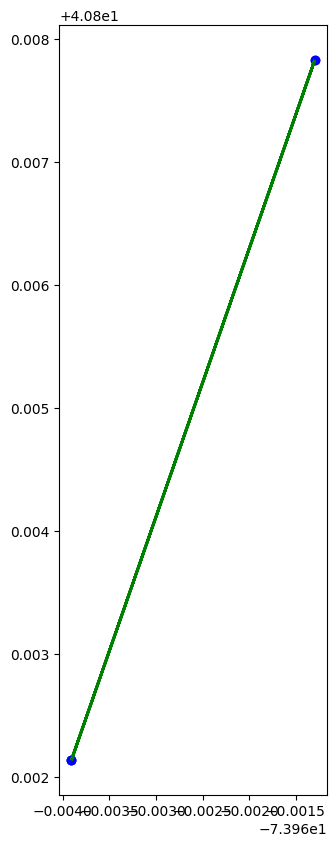

In [24]:
# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the points
gdf_monday[gdf_monday['event'] != 'Path'].plot(ax=ax, color='blue', marker='o', label='Events')

# Plot the path
gdf_path = gpd.GeoDataFrame(geometry=[path], crs="EPSG:4326")
gdf_path.plot(ax=ax, color='green', linewidth=2, label='Path')

# Adding annotations for events
for x, y, label in zip(gdf_monday['geometry'].x, gdf_monday['geometry'].y, gdf_monday['event']):
    if label != 'Path':
        ax.text(x, y, label, fontsize=12, ha='right')

plt.title('Spatial Path for Monday')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend()
plt.show()

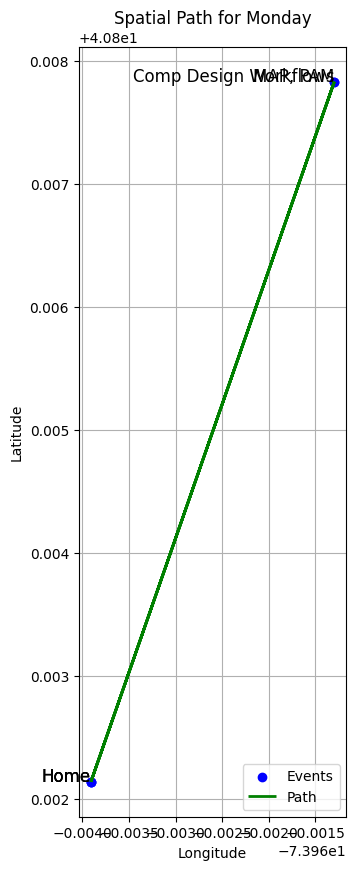

In [25]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString

# Data Preparation for Monday
monday_data = {
    'event': [
        'Home', 'MAP, PAM', 'Home', 'Comp Design Workflows', 'Home'
    ],
    'latitude': [
        40.8021406263019, 40.80782989687754, 40.8021406263019, 40.80782989687754, 40.8021406263019
    ],
    'longitude': [
        -73.96390876165282, -73.96129582731541, -73.96390876165282, -73.96129582731541, -73.96390876165282
    ],
    'start_time': [
        '2024-08-05 07:00', '2024-08-05 12:00', '2024-08-05 16:00', '2024-08-05 18:30', '2024-08-05 20:30'
    ],
    'end_time': [
        '2024-08-05 12:00', '2024-08-05 16:00', '2024-08-05 18:30', '2024-08-05 20:30', '2024-08-06 07:00'
    ]
}

df_monday = pd.DataFrame(monday_data)
df_monday['start_time'] = pd.to_datetime(df_monday['start_time'])
df_monday['end_time'] = pd.to_datetime(df_monday['end_time'])

# Create a GeoDataFrame
gdf_monday = gpd.GeoDataFrame(
    df_monday,
    geometry=gpd.points_from_xy(df_monday.longitude, df_monday.latitude),
    crs="EPSG:4326"
)

# Create a LineString to represent the path
path = LineString(gdf_monday.geometry.tolist())

# Add the path to the GeoDataFrame
gdf_path = gpd.GeoDataFrame(geometry=[path], crs="EPSG:4326")

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the points
gdf_monday.plot(ax=ax, color='blue', marker='o', label='Events')

# Plot the path
gdf_path.plot(ax=ax, color='green', linewidth=2, label='Path')

# Adding annotations for events
for x, y, label in zip(gdf_monday['geometry'].x, gdf_monday['geometry'].y, gdf_monday['event']):
    ax.text(x, y, label, fontsize=12, ha='right')

plt.title('Spatial Path for Monday')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend()
plt.show()

In [26]:
pip install geopandas matplotlib contextily

  Using cached rasterio-1.3.10-cp312-cp312-macosx_11_0_arm64.whl.metadata (14 kB)
  Using cached affine-2.4.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached snuggs-1.4.7-py3-none-any.whl.metadata (3.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 7.1 MB/s eta 0:00:00
Using cached rasterio-1.3.10-cp312-cp312-macosx_11_0_arm64.whl (18.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 4.4 MB/s eta 0:00:00
Using cached snuggs-1.4.7-py3-none-any.whl (5.4 kB)
Using cached affine-2.4.0-py3-none-any.whl (15 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 19.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


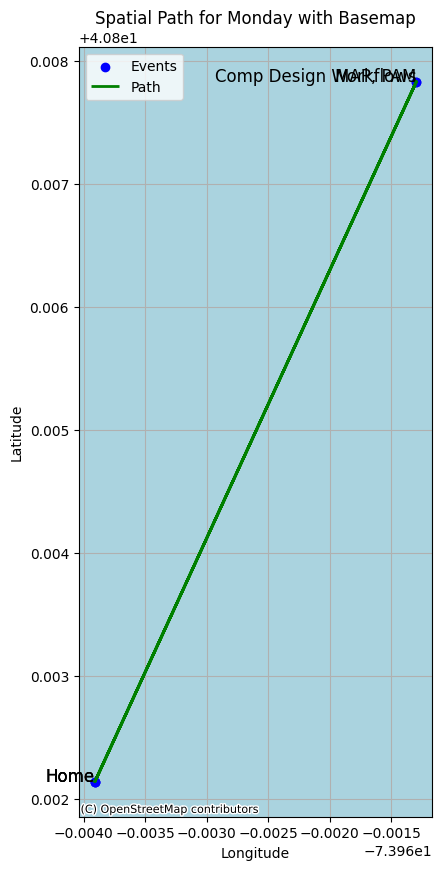

In [27]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString
import contextily as ctx

# Data Preparation for Monday
monday_data = {
    'event': [
        'Home', 'MAP, PAM', 'Home', 'Comp Design Workflows', 'Home'
    ],
    'latitude': [
        40.8021406263019, 40.80782989687754, 40.8021406263019, 40.80782989687754, 40.8021406263019
    ],
    'longitude': [
        -73.96390876165282, -73.96129582731541, -73.96390876165282, -73.96129582731541, -73.96390876165282
    ],
    'start_time': [
        '2024-08-05 07:00', '2024-08-05 12:00', '2024-08-05 16:00', '2024-08-05 18:30', '2024-08-05 20:30'
    ],
    'end_time': [
        '2024-08-05 12:00', '2024-08-05 16:00', '2024-08-05 18:30', '2024-08-05 20:30', '2024-08-06 07:00'
    ]
}

df_monday = pd.DataFrame(monday_data)
df_monday['start_time'] = pd.to_datetime(df_monday['start_time'])
df_monday['end_time'] = pd.to_datetime(df_monday['end_time'])

# Create a GeoDataFrame
gdf_monday = gpd.GeoDataFrame(
    df_monday,
    geometry=gpd.points_from_xy(df_monday.longitude, df_monday.latitude),
    crs="EPSG:4326"
)

# Create a LineString to represent the path
path = LineString(gdf_monday.geometry.tolist())

# Add the path to the GeoDataFrame
gdf_path = gpd.GeoDataFrame(geometry=[path], crs="EPSG:4326")

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the points
gdf_monday.plot(ax=ax, color='blue', marker='o', label='Events')

# Plot the path
gdf_path.plot(ax=ax, color='green', linewidth=2, label='Path')

# Adding annotations for events
for x, y, label in zip(gdf_monday['geometry'].x, gdf_monday['geometry'].y, gdf_monday['event']):
    ax.text(x, y, label, fontsize=12, ha='right')

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=15)

plt.title('Spatial Path for Monday with Basemap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend()
plt.show()

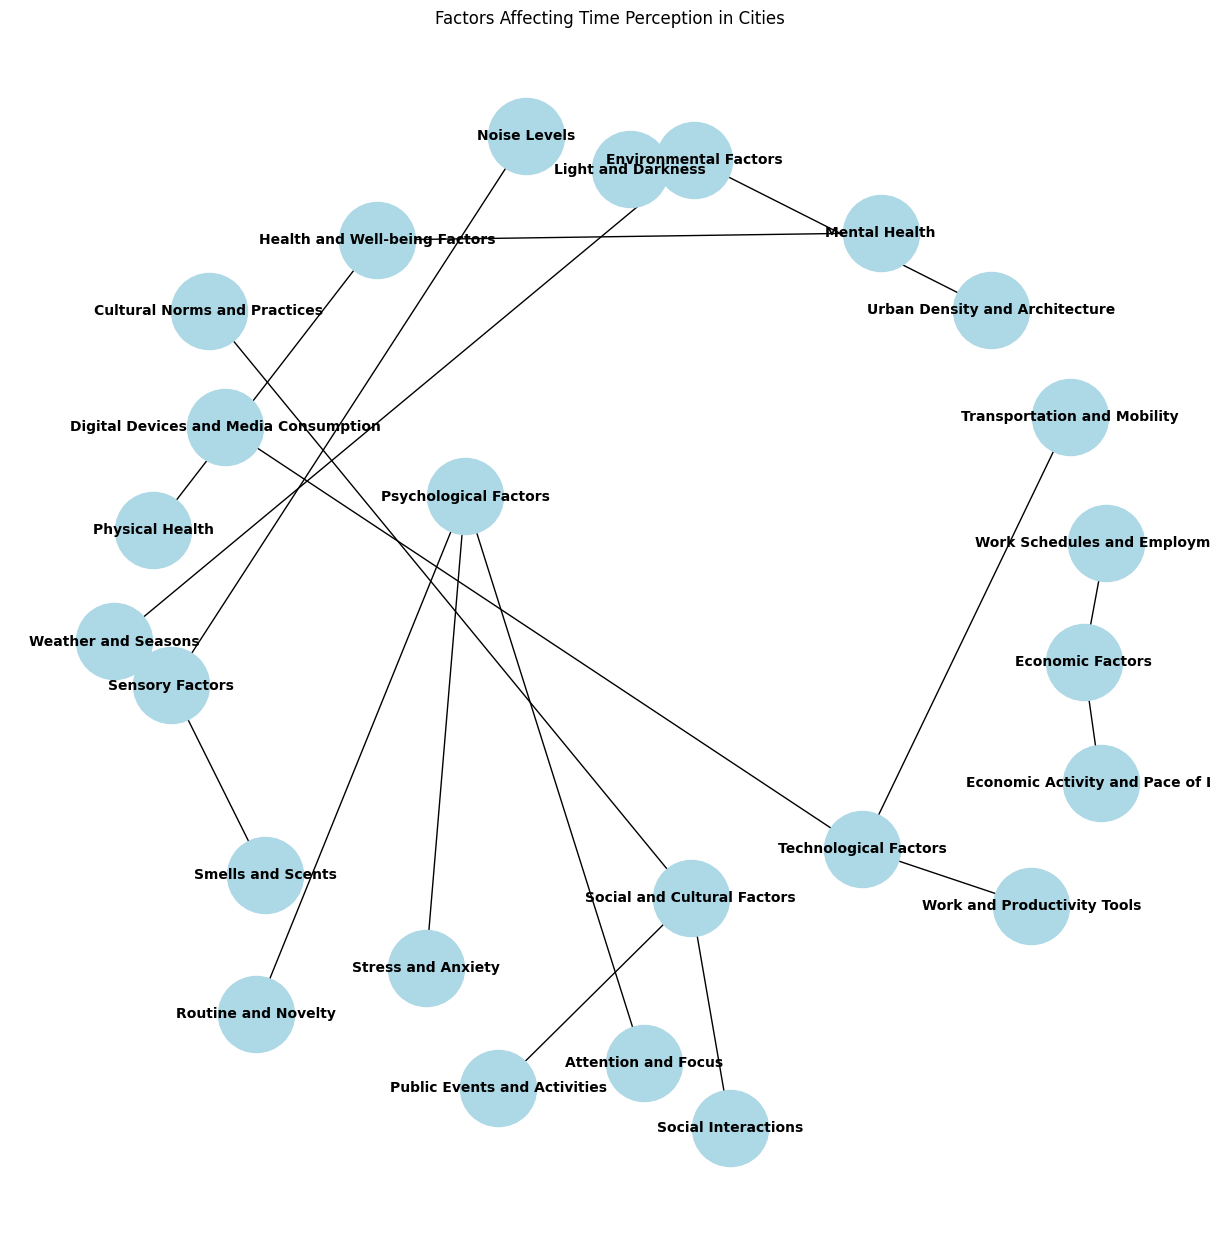

In [29]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the factors and their categories
factors = {
    "Environmental Factors": [
        "Light and Darkness",
        "Weather and Seasons",
        "Urban Density and Architecture"
    ],
    "Social and Cultural Factors": [
        "Social Interactions",
        "Cultural Norms and Practices",
        "Public Events and Activities"
    ],
    "Psychological Factors": [
        "Stress and Anxiety",
        "Attention and Focus",
        "Routine and Novelty"
    ],
    "Technological Factors": [
        "Digital Devices and Media Consumption",
        "Transportation and Mobility",
        "Work and Productivity Tools"
    ],
    "Economic Factors": [
        "Work Schedules and Employment",
        "Economic Activity and Pace of Life"
    ],
    "Health and Well-being Factors": [
        "Physical Health",
        "Mental Health"
    ],
    "Sensory Factors": [
        "Noise Levels",
        "Smells and Scents"
    ]
}

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges
for category, subcategories in factors.items():
    G.add_node(category)
    for subcategory in subcategories:
        G.add_node(subcategory)
        G.add_edge(category, subcategory)

# Draw the graph
pos = nx.spring_layout(G, k=1.5, iterations=50)
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', arrows=False)
plt.title("Factors Affecting Time Perception in Cities")
plt.show()